<a id = '0.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; text-align : center; background-color : black		; border-radius: 5px 5px;"><strong>Taager  Case Study </strong></p>  


<img src="https://media.licdn.com/dms/image/C5612AQFhjvnvCbxZFA/article-cover_image-shrink_600_2000/0/1520177652310?e=2147483647&amp;v=beta&amp;t=oFI2ef5zsM7Fe2U-nNVIeR_0vEcE5nPddkcxqxFp2ac" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="margin-left: 18%; float: center;  border:2px solid ; width:60%; height : 80%;"/></a>

<a id = '0.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; text-align : center; background-color : black; border-radius: 5px 5px;"><strong>Details about the datasets</strong></p>  


<table style="border-collapse: collapse;font-size: 15px; width:800px;">
<tr> 
    <th style="background-color:#D3DBDD; color:black">Variable Name </th>
    <th style="width:500px; background-color:#D3DBDD; color:black">Description</th>
  </tr>
  <tr>
    <td>Merchant_ID</td>
    <td>Unique identifier for each merchant</td>
  </tr>
  <tr>
    <td>Merchant_Email</td>
    <td>Email address associated with the merchant</td>
  </tr>
  <tr>
    <td>Signup_Date</td>
    <td>The date when the merchant signed up or registered</td>
  </tr>
  <tr>
    <td>Last_Email_Opened_Date</td>
    <td>The most recent date when the merchant opened an email sent to them</td>
  </tr>
  <tr>
    <td>Last_Order_Date</td>
    <td>The date of the most recent order placed by the merchant</td>
  </tr>
    <tr>
    <td>Total_Orders</td>
    <td>The total number of orders placed by the merchant</td>
  </tr>
    <tr>
    <td>Email_Status</td>
    <td>The current status of the merchant's email</td>
  </tr>
     <tr>
    <td>Test_Group</td>
    <td>Categorizes merchants into two groups based on the type of email they received</td>
  </tr>


<a id="section-seven"></a>
<div class="alert alert-success" role="alert">
  <h3>Our Questions:</h3>
    <ul>
        <li>(Q1) How would you prevent churn and improve email deliverability? 
        <li>(Q2) What steps should be taken next to improve CRM performance? 
    </ul>
</div>

<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black"> 1- Importing libraries 

In [481]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
plt.style.use('dark_background')
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

<a id = '0.2'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#2" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black"> 2- Importing dataset

In [482]:
data = pd.read_excel('CRM_Task_Dataset.xlsx')

<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black"> 3- Basic Data Exploration(Understanding the Dataset

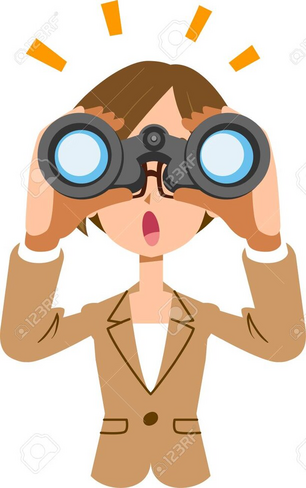

#### We will check the below things:

* head of the dataset
* the shape of the dataset
* datatypes for every column 
* summary of the dataset

In [483]:
data.head(5).style.background_gradient()

,Merchant_ID,Merchant_Email,Signup_Date,Last_Email_Opened_Date,Last_Order_Date,Total_Orders,Email_Status,Group
0,4001,merchant1@example.com,2023-01-01 00:00:00,2023-09-11 00:00:00,2023-07-12 00:00:00,0,Opened,Generic
1,4002,merchant2@example.com,2023-01-02 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,4,Opened,Personalized
2,4003,merchant3@example.com,2023-01-03 00:00:00,2023-06-15 00:00:00,2023-06-07 00:00:00,44,Opened,Generic
3,4004,merchant4@example.com,2023-01-04 00:00:00,2023-09-15 00:00:00,2023-10-22 00:00:00,3,Opened,Personalized
4,4005,merchant5@example.com,2023-01-05 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,15,Spam Reported,Personalized


In [484]:
data.shape

(200, 8)

In [485]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Merchant_ID             200 non-null    int64         
 1   Merchant_Email          200 non-null    object        
 2   Signup_Date             200 non-null    datetime64[ns]
 3   Last_Email_Opened_Date  200 non-null    datetime64[ns]
 4   Last_Order_Date         200 non-null    datetime64[ns]
 5   Total_Orders            200 non-null    int64         
 6   Email_Status            200 non-null    object        
 7   Group                   200 non-null    object        
dtypes: datetime64[ns](3), int64(2), object(3)
memory usage: 12.6+ KB


In [486]:
data.describe().style.background_gradient()

,Merchant_ID,Signup_Date,Last_Email_Opened_Date,Last_Order_Date,Total_Orders
count,200.000000,200,200,200,200.000000
mean,4100.500000,2023-04-10 12:00:00,2023-07-01 12:57:36,2023-07-05 00:57:36,25.340000
min,4001.000000,2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,0.000000
25%,4050.750000,2023-02-19 18:00:00,2023-06-11 18:00:00,2023-06-12 06:00:00,12.000000
50%,4100.500000,2023-04-10 12:00:00,2023-07-24 12:00:00,2023-07-30 12:00:00,25.000000
75%,4150.250000,2023-05-30 06:00:00,2023-09-12 00:00:00,2023-09-20 06:00:00,37.000000
max,4200.000000,2023-07-19 00:00:00,2023-10-26 00:00:00,2023-10-28 00:00:00,49.000000
std,57.879185,nan,nan,nan,14.326221


<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black"> 4- Data Cleaning


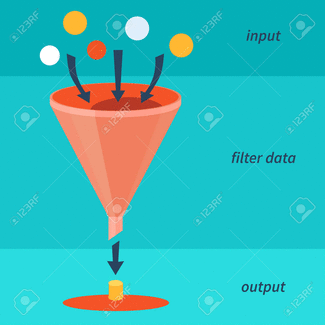

* `1- Checking for null values`
* `2- Drop data duplicated`

`Checking for null values`

In [487]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null.style.background_gradient()

,Null Values,Percentage Null Values
Merchant_ID,0,0.000000
Merchant_Email,0,0.000000
Signup_Date,0,0.000000
Last_Email_Opened_Date,0,0.000000
Last_Order_Date,0,0.000000
Total_Orders,0,0.000000
Email_Status,0,0.000000
Group,0,0.000000


* Data doesn't contain any missing values.

`Drop data duplicated`

In [488]:
duplicate = data.duplicated()
print(duplicate.sum())

0


* Data doesn't contain any duplicate values.

<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black"> 5- Feature Engineering


**Calculate Days Since Last Email Open and Last Order**

In [489]:
today = pd.Timestamp.now()
data['Days_Since_Last_Email_Open'] = (today - data['Last_Email_Opened_Date']).dt.days
data['Days_Since_Last_Order'] = (today - data['Last_Order_Date']).dt.days

In [490]:
data.head()

,Merchant_ID,Merchant_Email,Signup_Date,Last_Email_Opened_Date,Last_Order_Date,Total_Orders,Email_Status,Group,Days_Since_Last_Email_Open,Days_Since_Last_Order
0,4001,merchant1@example.com,2023-01-01,2023-09-11,2023-07-12,0,Opened,Generic,494,555
1,4002,merchant2@example.com,2023-01-02,2023-01-01,2023-01-01,4,Opened,Personalized,747,747
2,4003,merchant3@example.com,2023-01-03,2023-06-15,2023-06-07,44,Opened,Generic,582,590
3,4004,merchant4@example.com,2023-01-04,2023-09-15,2023-10-22,3,Opened,Personalized,490,453
4,4005,merchant5@example.com,2023-01-05,2023-01-01,2023-01-01,15,Spam Reported,Personalized,747,747


<p style = "font-size : 35px; color : #E0FFFF ; text-align : center; background-color : #008080		; border-radius: 5px 5px;"><strong> (Q1) How would you prevent churn and improve email deliverability?</strong></p>  


<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:green;font-size : 30px;color:white"> Define segmentation logic 
    
(It's a Changing rules that depend on the business)

In [491]:
def segment_merchant(row):
    if row['Total_Orders'] > 10 and row['Days_Since_Last_Order'] <= 500:
        return 'Engaged'
    elif row['Total_Orders'] > 0 and row['Days_Since_Last_Order'] > 500:
        return 'At Risk'
    elif row['Total_Orders'] == 0:
        return 'Inactive'
    elif row['Signup_Date'] >= today - pd.Timedelta(days=90):
        return 'New'
    else:
        return 'Other'

In [492]:
data['Segment'] = data.apply(segment_merchant , axis=1)

In [493]:
data.head().style.background_gradient()

,Merchant_ID,Merchant_Email,Signup_Date,Last_Email_Opened_Date,Last_Order_Date,Total_Orders,Email_Status,Group,Days_Since_Last_Email_Open,Days_Since_Last_Order,Segment
0,4001,merchant1@example.com,2023-01-01 00:00:00,2023-09-11 00:00:00,2023-07-12 00:00:00,0,Opened,Generic,494,555,Inactive
1,4002,merchant2@example.com,2023-01-02 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,4,Opened,Personalized,747,747,At Risk
2,4003,merchant3@example.com,2023-01-03 00:00:00,2023-06-15 00:00:00,2023-06-07 00:00:00,44,Opened,Generic,582,590,At Risk
3,4004,merchant4@example.com,2023-01-04 00:00:00,2023-09-15 00:00:00,2023-10-22 00:00:00,3,Opened,Personalized,490,453,Other
4,4005,merchant5@example.com,2023-01-05 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,15,Spam Reported,Personalized,747,747,At Risk


* Customer Segmentation Distribution

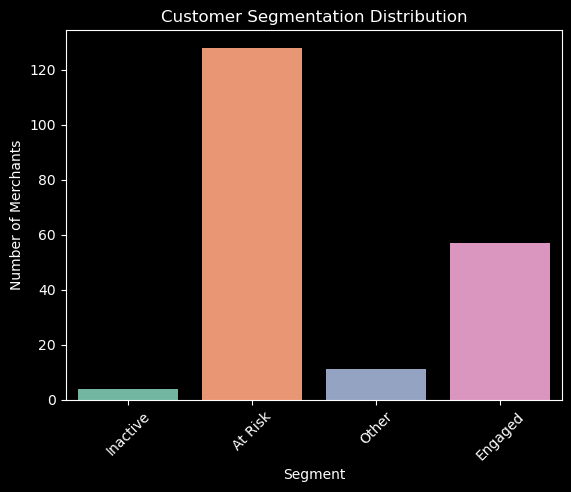

In [494]:
sns.countplot(data=data, x='Segment', palette='Set2')
plt.title('Customer Segmentation Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Merchants')
plt.xticks(rotation=45)
plt.show()

* Analyze average orders per segment

In [495]:
data[['Segment' , 'Total_Orders']].groupby('Segment').agg('mean').style.background_gradient()

,Total_Orders
Segment,
At Risk,26.023438
Engaged,29.245614
Inactive,0.000000
Other,6.363636


<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:green;font-size : 30px;color:white"> Recommendations

**Engaged Customers:**

`Send loyalty rewards and exclusive offers.`

**At-Risk Customers:**

`Offer discounts or send "We Miss You" campaigns.`

**Inactive Customers:**

`Use re-engagement campaigns or collect feedback.`


* We can identify inactive users (merchants who haven’t opened emails in 500+ days).

In [496]:
inactive_users = data[data['Segment'] == 'Inactive']

reengagement_list = inactive_users[['Merchant_ID', 'Merchant_Email']]
reengagement_list.style.background_gradient()

,Merchant_ID,Merchant_Email
0,4001,merchant1@example.com
23,4024,merchant24@example.com
149,4150,merchant150@example.com
177,4178,merchant178@example.com


Recommendations

Create re-engagement campaign list


<p style = "font-size : 35px; color : #E0FFFF ; text-align : center; background-color : #008080		; border-radius: 5px 5px;"><strong>(Q2) What steps should be taken next to improve CRM performance?</strong></p>  

<table style="border-collapse: collapse;font-size: 15px; width:800px;">
<tr> 
    <th style="background-color:#D3DBDD; color:black">Step </th>
    <th style="width:500px; background-color:#D3DBDD; color:black">Action</th>
  </tr>
  <tr>
    <td style= "color:yellow">Data Quality</td>
    <td>Clean, standardize, and validate CRM data.</td>
  </tr>
  <tr>
    <td style= "color:yellow">Segmentation</td>
    <td>Create behavior-based segments (active, dormant, inactive).</td>
  </tr>
  <tr>
    <td style= "color:yellow">Engagement</td>
    <td>Use personalization, A/B testing, and re-engagement campaigns.</td>
  </tr>
  <tr>
    <td style= "color:yellow">Performance</td>
    <td>Metrics	Analyze open rates, CTRs, and conversion rates to optimize campaigns.</td>
  </tr>
  <tr>
    <td style= "color:yellow">Predictive Analytics</td>
    <td>Use machine learning to predict churn and engagement trends.</td>
  </tr>


<p style = "font-size : 35px; color : #E0FFFF ; text-align : center; background-color : #121A13		; border-radius: 5px 5px;"><strong> A/B Testing for Email Optimization </strong></p>  


<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:green;font-size : 30px;color:white"> Analyzing the test results and determining which group performed better


* The goal is to evaluate which group achieves better outcomes using statistical methods.

* Analyzing group performance (Generic vs. Personalized)

In [497]:
data[['Group' , 'Total_Orders']].groupby('Group').agg('mean').style.background_gradient()

,Total_Orders
Group,
Generic,25.913462
Personalized,24.718750


* We want to ensure that the difference between the two groups is statistically significant or not

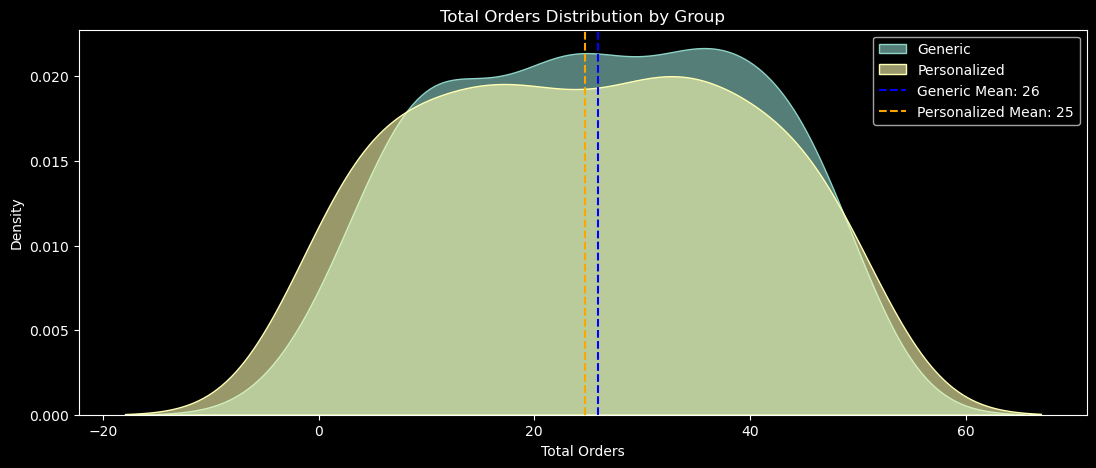

In [498]:
plt.figure(figsize=(13,5))
sns.kdeplot(data=data[data['Group'] == 'Generic'], x='Total_Orders', fill=True, label='Generic', alpha=0.6)
sns.kdeplot(data=data[data['Group'] == 'Personalized'], x='Total_Orders', fill=True, label='Personalized', alpha=0.6)
Generic_mean = data[data['Group'] == 'Generic']['Total_Orders'].mean()
Personalized_mean = data[data['Group'] == 'Personalized']['Total_Orders'].mean()
plt.axvline(Generic_mean, color='blue', linestyle='--', label=f'Generic Mean: {Generic_mean:.0f}')
plt.axvline(Personalized_mean, color='orange', linestyle='--', label=f'Personalized Mean: {Personalized_mean:.0f}')
plt.title('Total Orders Distribution by Group')
plt.xlabel('Total Orders')
plt.ylabel('Density')
plt.legend()
plt.show()

**Null Hypothesis (H₀): There is no significant difference in the mean total orders between Group A and Group B.**

**Alternative Hypothesis (H₁): There is a significant difference in the mean total orders between Group A and Group B.**

------

$H_0:\ \mu_x = \mu_y$

$H_1:\ \mu_x  \neq \mu_y$

* Splitting the data into Group A and Group B based on the 'Group' column

In [499]:
Group_A_Generic = data[data['Group'] == 'Generic']['Total_Orders'].values
Group_B_Personalized = data[data['Group'] == 'Personalized']['Total_Orders'].values

In [500]:
alpha = 0.05
Test_statistic, p_value = ttest_ind(Group_A_Generic, Group_B_Personalized, alternative='two-sided')

print(f'Test_statistic = {Test_statistic},   p_value = {p_value}', '\n')

if p_value < alpha:
  print(f'Since p_value < {alpha}, reject null hypothesis.')
else:
  print(f'Since p_value > {alpha}, the null hypothesis cannot be rejected.')

Test_statistic = 0.5882391402579997,   p_value = 0.5570421560202009 

Since p_value > 0.05, the null hypothesis cannot be rejected.


**Based on the mean total orders, the Generic group performed slightly better than the Personalized group. However, the difference is not statistically significant, indicating that both groups performed similarly in terms of total orders.**

<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:green;font-size : 30px;color:white"> what other metrics used to measure success?



**1- Email Open Rate**

`The percentage of recipients who opened the email. This metric helps us to understand how effective the subject lines are. (We can use this metric through Last_Email_Opened_Date column by filling null values with 0 and other with 1 `

**2- Time to First Order (from Signup_Date to Last_Order_Date)**

`Measure how long it takes for merchants to make their first purchase)`

* Calculate the Time Between Signup and First Order (days)

In [501]:
data['Days_To_First_Order'] = (data['Last_Order_Date'] - data['Signup_Date']).dt.days

In [502]:
data[data['Days_To_First_Order'] < 0].style.background_gradient()

,Merchant_ID,Merchant_Email,Signup_Date,Last_Email_Opened_Date,Last_Order_Date,Total_Orders,Email_Status,Group,Days_Since_Last_Email_Open,Days_Since_Last_Order,Segment,Days_To_First_Order
1,4002,merchant2@example.com,2023-01-02 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,4,Opened,Personalized,747,747,At Risk,-1
4,4005,merchant5@example.com,2023-01-05 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,15,Spam Reported,Personalized,747,747,At Risk,-4
5,4006,merchant6@example.com,2023-01-06 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,23,Not Opened,Generic,747,747,At Risk,-5
12,4013,merchant13@example.com,2023-01-13 00:00:00,2023-09-12 00:00:00,2023-01-01 00:00:00,19,Opened,Personalized,493,747,At Risk,-12
27,4028,merchant28@example.com,2023-01-28 00:00:00,2023-07-21 00:00:00,2023-01-01 00:00:00,42,Opened,Generic,546,747,At Risk,-27
37,4038,merchant38@example.com,2023-02-07 00:00:00,2023-10-10 00:00:00,2023-01-01 00:00:00,22,Opened,Generic,465,747,At Risk,-37
44,4045,merchant45@example.com,2023-02-14 00:00:00,2023-10-08 00:00:00,2023-01-01 00:00:00,25,Bounced,Generic,467,747,At Risk,-44
49,4050,merchant50@example.com,2023-02-19 00:00:00,2023-07-05 00:00:00,2023-01-01 00:00:00,49,Opened,Personalized,562,747,At Risk,-49
51,4052,merchant52@example.com,2023-02-21 00:00:00,2023-07-20 00:00:00,2023-01-01 00:00:00,10,Not Opened,Generic,547,747,At Risk,-51
59,4060,merchant60@example.com,2023-03-01 00:00:00,2023-07-24 00:00:00,2023-01-01 00:00:00,8,Opened,Generic,543,747,At Risk,-59


* We have a negative value for the difference between Last_Order_Date and Signup_Date. This is strange because you must sign up first and then ask for orders, so we can drop these rows.

In [503]:
T_First_Order_data = data[data['Days_To_First_Order'] > 0]
T_First_Order_data.style.background_gradient()

,Merchant_ID,Merchant_Email,Signup_Date,Last_Email_Opened_Date,Last_Order_Date,Total_Orders,Email_Status,Group,Days_Since_Last_Email_Open,Days_Since_Last_Order,Segment,Days_To_First_Order
0,4001,merchant1@example.com,2023-01-01 00:00:00,2023-09-11 00:00:00,2023-07-12 00:00:00,0,Opened,Generic,494,555,Inactive,192
2,4003,merchant3@example.com,2023-01-03 00:00:00,2023-06-15 00:00:00,2023-06-07 00:00:00,44,Opened,Generic,582,590,At Risk,155
3,4004,merchant4@example.com,2023-01-04 00:00:00,2023-09-15 00:00:00,2023-10-22 00:00:00,3,Opened,Personalized,490,453,Other,291
6,4007,merchant7@example.com,2023-01-07 00:00:00,2023-09-11 00:00:00,2023-07-30 00:00:00,15,Opened,Personalized,494,537,At Risk,204
7,4008,merchant8@example.com,2023-01-08 00:00:00,2023-09-30 00:00:00,2023-09-21 00:00:00,1,Not Opened,Personalized,475,484,Other,256
8,4009,merchant9@example.com,2023-01-09 00:00:00,2023-01-01 00:00:00,2023-06-02 00:00:00,48,Bounced,Personalized,747,595,At Risk,144
9,4010,merchant10@example.com,2023-01-10 00:00:00,2023-08-27 00:00:00,2023-10-07 00:00:00,27,Spam Reported,Generic,509,468,Engaged,270
10,4011,merchant11@example.com,2023-01-11 00:00:00,2023-09-25 00:00:00,2023-07-18 00:00:00,31,Opened,Personalized,480,549,At Risk,188
11,4012,merchant12@example.com,2023-01-12 00:00:00,2023-01-01 00:00:00,2023-10-18 00:00:00,26,Opened,Generic,747,457,Engaged,279
13,4014,merchant14@example.com,2023-01-14 00:00:00,2023-01-01 00:00:00,2023-06-09 00:00:00,23,Opened,Generic,747,588,At Risk,146


* Calculate the average time to first order

In [504]:
T_First_Order_data[['Group' , 'Days_To_First_Order']].groupby('Group').agg('mean').style.background_gradient()

,Days_To_First_Order
Group,
Generic,129.064935
Personalized,144.896104


In [505]:
Group_A_Generic_T_First_Order = T_First_Order_data[T_First_Order_data['Group'] == 'Generic']['Days_To_First_Order'].values
Group_B_Personalized_T_First_Order = T_First_Order_data[T_First_Order_data['Group'] == 'Personalized']['Days_To_First_Order'].values

In [506]:
Group_A_Generic_T_First_Order

array([192, 155, 270, 279, 146, 235, 264, 280, 250, 209, 267, 229, 200,
       259, 238, 243, 252, 138, 209, 116, 151, 137,  91, 134,  87, 115,
       101, 169, 198,  93, 168,  87, 176, 160,  97,  92,  78, 108,  81,
        64, 108, 181, 129, 101,  94,  85, 112,  38,  76, 122,  72,  78,
       125,  21, 118, 128, 108,  63,  59, 127, 108,  16,  88, 117, 107,
        17,  78, 107,  98,  43,  36,  13, 108,  60,  25,  55,  99],
      dtype=int64)

In [507]:
Group_B_Personalized_T_First_Order

array([291, 204, 256, 144, 188, 282, 182, 185, 245, 203, 240, 230, 236,
       215, 248, 171, 184, 148, 256, 160, 245, 219, 222, 124, 106, 124,
       123, 124, 190, 120, 199, 203, 121, 169, 172, 188, 138, 124, 132,
       146, 186, 188, 192, 150,  50, 182, 154, 134,  66, 119, 179,  74,
        20, 122, 105,  57, 150,  18, 148, 145, 119,  61, 110, 126, 116,
        27,  67,  94,  65, 114,  55,  59,  48,   1,  61,  91,  47],
      dtype=int64)

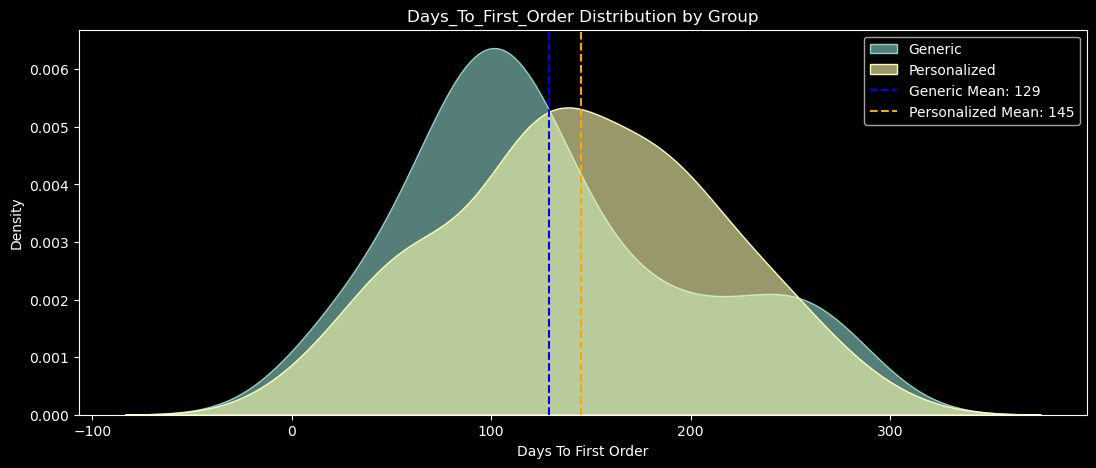

In [508]:
plt.figure(figsize=(13,5))
sns.kdeplot(data=T_First_Order_data[T_First_Order_data['Group'] == 'Generic'], x='Days_To_First_Order', fill=True, label='Generic', alpha=0.6)
sns.kdeplot(data=T_First_Order_data[T_First_Order_data['Group'] == 'Personalized'], x='Days_To_First_Order', fill=True, label='Personalized', alpha=0.6)
Generic_mean = T_First_Order_data[T_First_Order_data['Group'] == 'Generic']['Days_To_First_Order'].mean()
Personalized_mean = T_First_Order_data[T_First_Order_data['Group'] == 'Personalized']['Days_To_First_Order'].mean()
plt.axvline(Generic_mean, color='blue', linestyle='--', label=f'Generic Mean: {Generic_mean:.0f}')
plt.axvline(Personalized_mean, color='orange', linestyle='--', label=f'Personalized Mean: {Personalized_mean:.0f}')
plt.title('Days_To_First_Order Distribution by Group')
plt.xlabel('Days To First Order')
plt.ylabel('Density')
plt.legend()
plt.show()

In [509]:
alpha = 0.05
Test_statistic, p_value = ttest_ind(Group_A_Generic_T_First_Order, Group_B_Personalized_T_First_Order, alternative='two-sided')

print(f'Test_statistic = {Test_statistic},   p_value = {p_value}', '\n')

if p_value < alpha:
  print(f'Since p_value < {alpha}, reject null hypothesis.')
else:
  print(f'Since p_value > {alpha}, the null hypothesis cannot be rejected.')

Test_statistic = -1.4249070581582688,   p_value = 0.15623411579198188 

Since p_value > 0.05, the null hypothesis cannot be rejected.


**Based on the mean Days_To_First_Order, the Generic group performed slightly better than the Personalized group. However, the difference is not statistically significant, indicating that both groups performed similarly in terms of Days_To_First_Order.**

**Analyzing Test Group based on Email_Status**

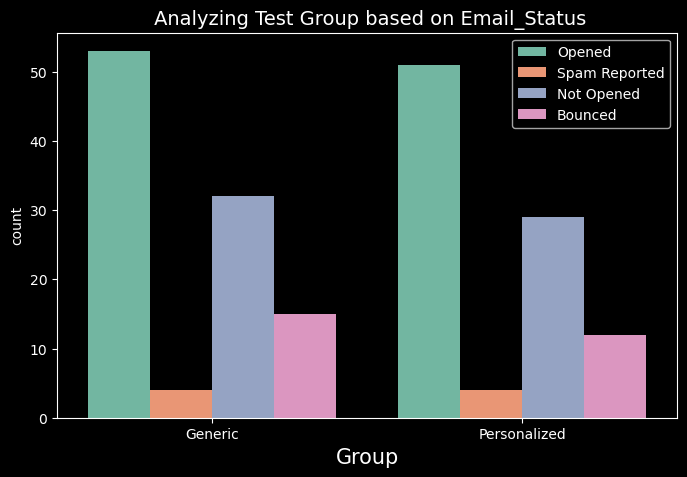

In [510]:
plt.figure(figsize=(8,5))
plt.title(' Analyzing Test Group based on Email_Status', fontsize = 14)
sns.countplot(data = data , x = 'Group' , hue = 'Email_Status' , palette='Set2')
plt.xlabel('Group', fontsize = 15)
plt.legend()
plt.show()

The chart shows that both groups have similar distributions across the different email statuses, indicating that the performance of the Generic and Personalized groups is quite comparable in terms of email engagement and deliverability.

<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:green;font-size : 30px;color:white"> what other changes could impact email engagement?

**Optimize Send Times**

Experiment with different send times to determine when merchants will most likely open and engage with your emails.

**Improve Subject Lines**

Crafting compelling and relevant subject lines that grab attention. Use personalization, urgency, and curiosity to entice recipients to open your emails.

**Enhance Email Design**

Ensuring the emails are visually appealing and mobile-friendly and Using a clean layout, high-quality images, and clear calls to action (CTAs) to make it easy for recipients to engage with the content.

**A/B Testing**

Continuously testing different elements of the emails, such as subject lines, content, CTAs, and send times. Using the results to optimize the email campaigns for better engagement.

